排序算法：
https://www.bilibili.com/video/av9830014?from=search&seid=18096852011196863544

一般而言，个人在面试的时候，会问面试者知道哪些排序算法，选一个自己熟悉排序算法。讲下它的主要特点（大部分人会选**冒泡**），比如时间复杂度 / 稳定性 这些，再比如有个序列 (1, 4, 2, 3) 要比较多少次。如果答的不好，就不继续。如果继续，一般会把重点放在 **[快速排序](https://blog.csdn.net/razor87/article/details/71155518)** 和 **堆排,[三路快排](https://www.jianshu.com/p/6d68a183406f), 归并 **，进一步可能会要求手写实现。


## 冒泡
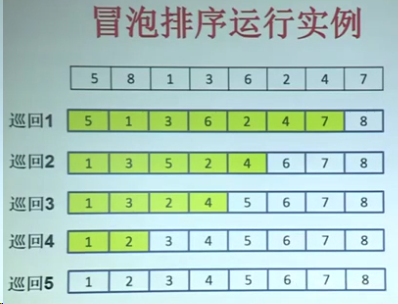
白色表示已经排好了


# 选择排序
冒泡排序法是如果当前元素比下一个元素大(升序)，则两个数交换．而简单选择算法是先找到整个待排序列中最小的，然后与待排序列中第一个元素交换，每次只交换一次．

## 插入排序
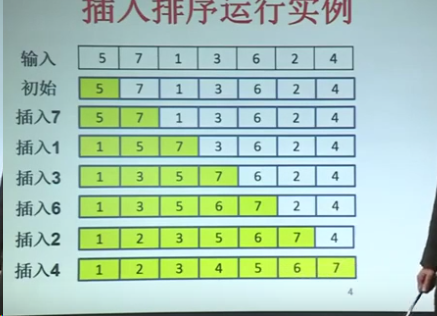
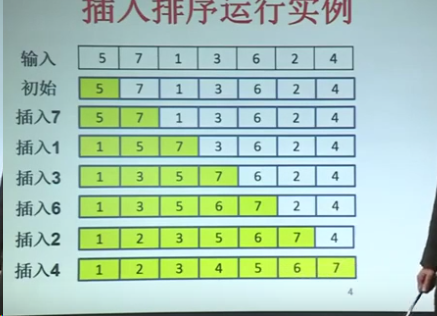
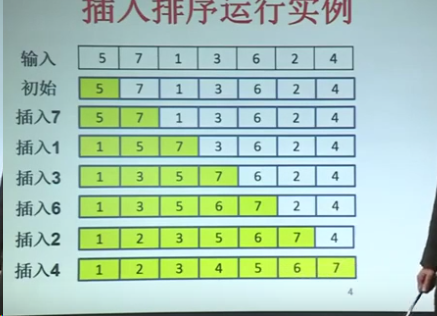
黄色表示已经排好了



## 快速排序
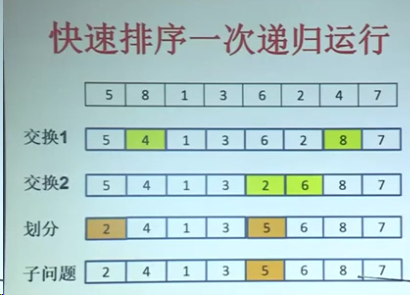

## 二分归并排序：
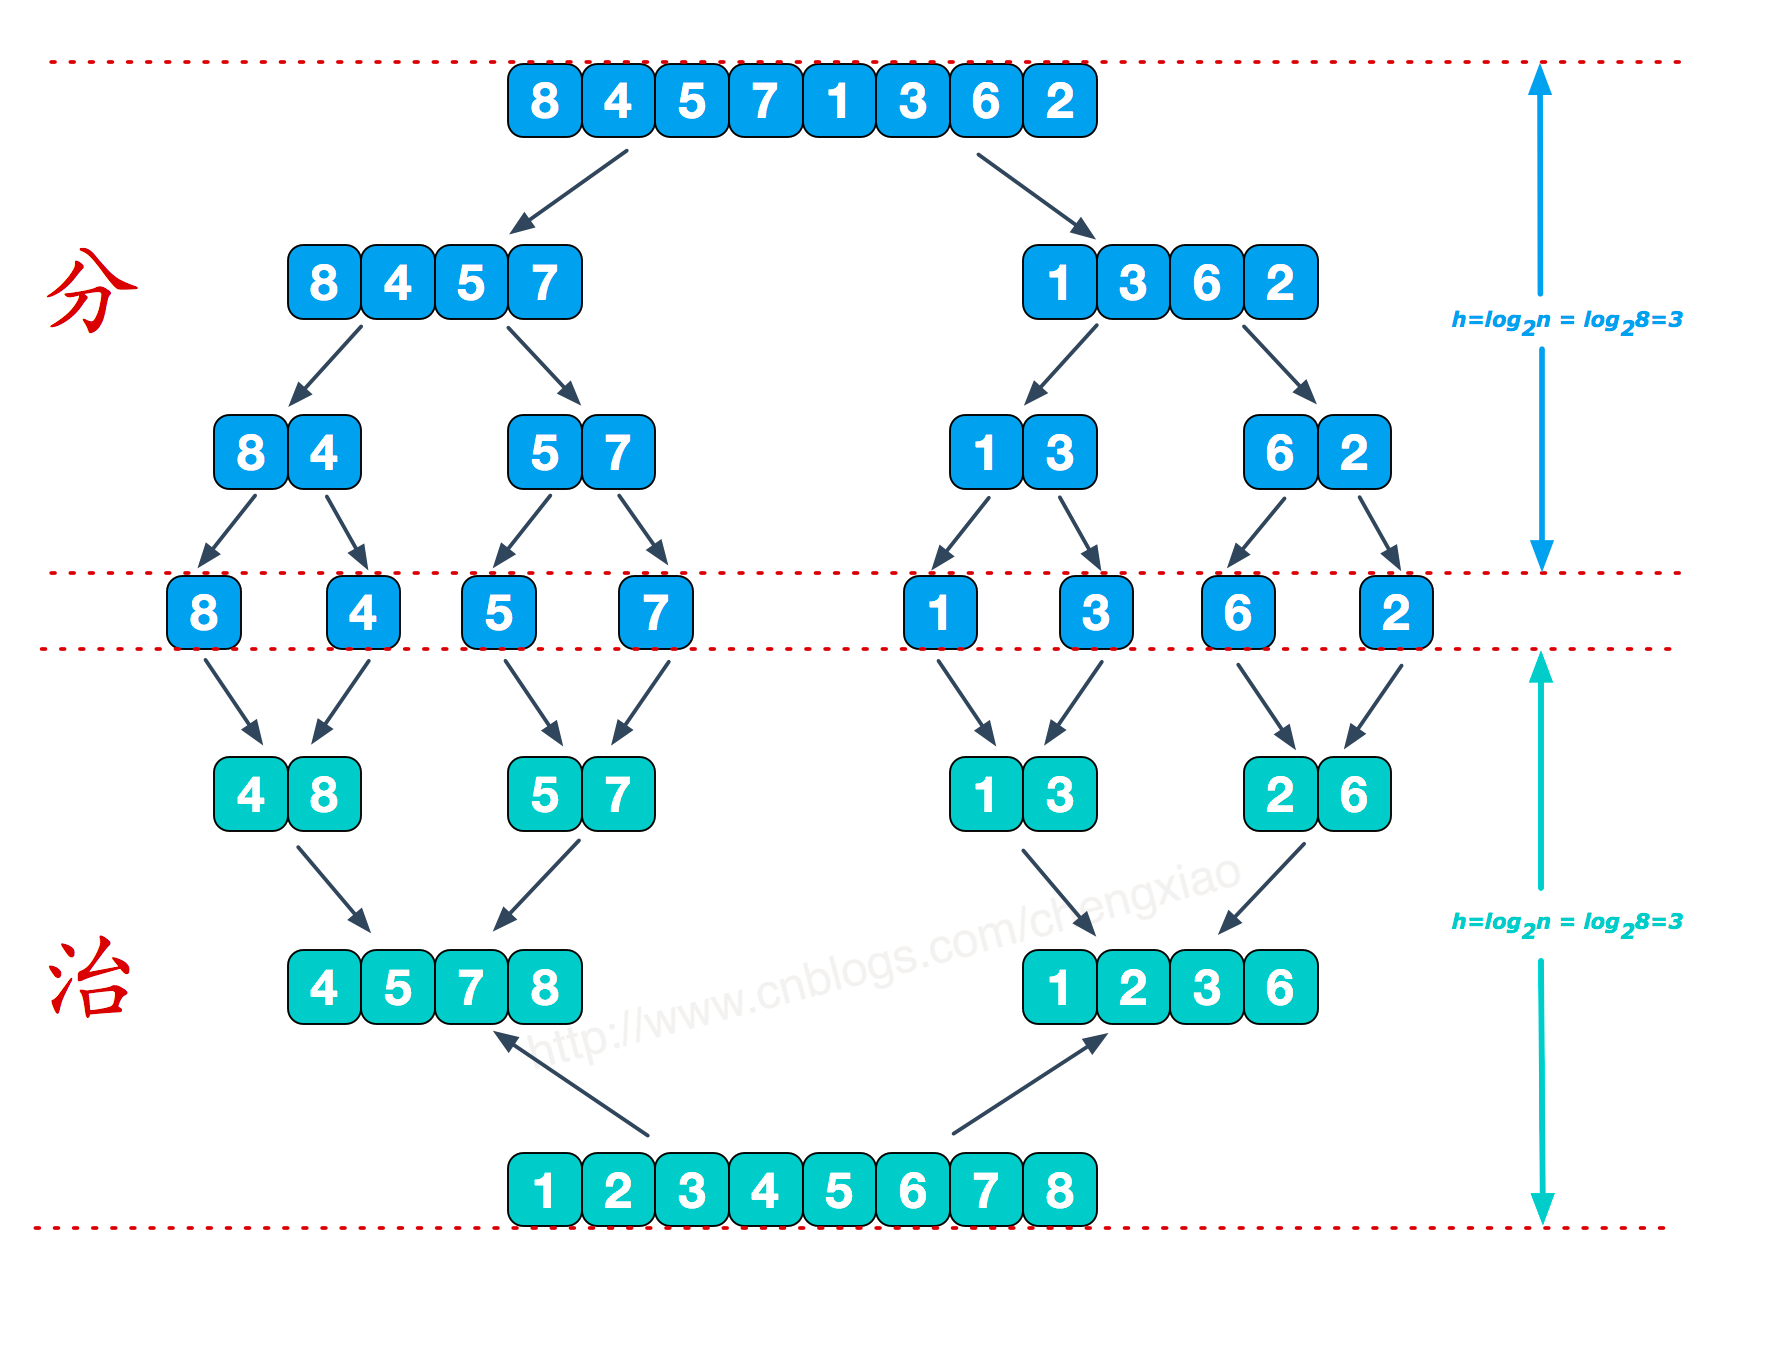

In [ ]:
#

In [ ]:
#冒泡
def bubble(ar):
    for i in range(len(ar)):
        for j in range(len(ar)-i):
            if ar[j]>ar[j+1]:
                ar[j],ar[j+1]=ar[j+1],ar[j]

In [3]:
# 快排
#https://blog.csdn.net/pythondafahao/article/details/80084385
def quick_sort(array, l, r):
    if l<r:
        q=parti(array,l,r)
        quick_sort(array, l, q-1)
        quick_sort(array, q+1, r)
## 这个返回的刚好可以是K分的一个点  
def parti(array,l,r):
    x=array[r]
    i=l-1
    for j in range(l,r):
        if array[j]<=x:#就是达到一个效果：从小到大，i是小边的最后一个，i+1则是大边的开始第一个，
                        #遇到了一个比x小的，那么就要把他给放到小的那边，那么就把I+1和j交换就可以了
                        #就是把大边的第一个和它交换即可
            i+=1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[r] = array[r], array[i + 1] #把基准的那个放到小，大的中间，前面也说了i+1就是大边的交换
    return i+1
    
ar=[1,3, 9,  1, 4, 9,  8, 10, 7, 6, 2]
quick_sort(ar, 0, len(ar)-1)
print(ar)

[1, 1, 2, 3, 4, 6, 7, 8, 9, 9, 10]


In [20]:
import random, time
#归并算法
def merge_sort(lst):
    if len(lst) <= 1:
        return lst          # 从递归中返回长度为1的序列

    middle = len(lst) // 2
    left = merge_sort(lst[:middle])     # 通过不断递归，将原始序列拆分成n个小序列
    right = merge_sort(lst[middle:])
    return merge(left, right)

def merge(left, right):
    i, j = 0, 0
    result = []
    while i < len(left) and j < len(right):  # 比较传入的两个子序列，对两个子序列进行排序
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])         # 将排好序的子序列合并
    result.extend(right[j:])
    return result

if __name__ == "__main__":
    start = time.clock()

    rand_lst = []
    for i in range(6):
        rand_lst.append(round(random.random()*100, 2))
    lst = merge_sort(rand_lst)

    end = time.clock()
    print (lst)
    print ("done  ", (end-start))

[4.07, 15.89, 32.24, 70.45, 70.76, 97.81]
done   7.679996723197746e-05


In [ ]:
# 三排
def quick_sort_3way(array, l, r,eq=0):
    if l < r:
        q,eq = partition(array, l, r)
        quick_sort(array, l, q - 1)
        quick_sort(array, q + 1+eq, r)


def partition(array, l, r):
    x = array[r]
    i = l - 1
    eq=0
    for j in range(l, r):
        if array[j] < x:
            i += 1
            array[i], array[j] = array[j], array[i]
        elif array[j] == x:
            eq +=1
            array[i+eq], array[j] = array[j], array[i+eq]

    array[i + 1], array[r] = array[r], array[i + 1]
    return i + 1,eq


ar=[1,3, 9,  1, 4, 9,  8, 10, 7, 6, 2]
quick_sort(ar, 0, len(ar)-1)
print(ar)

In [27]:
#这个得用双指针
def color_3way(ar):
    idx=0
    i=0
    j=len(ar)-1
    while idx<=j:
        if ar[idx]==0:
            ar[i],ar[idx]=ar[idx],ar[i]
            i=i+1 #这个0的前沿,
            idx+=1#除了=2的情况idx不变，其他情况都是要变的
        elif ar[idx]==2:
            ar[idx],ar[j]=ar[j],ar[idx]
            j-=1#这个2的前沿，如果等于2，只能说把2换到末尾，
                #至于换过来的是啥情况，需要重新判断
                #因此，idx不变
        else:
            idx+=1
        print(ar)
ar=[1,0, 1, 0, 2,1, 2, 0, 1, 0, 2, 1]
color_3way(ar)
print(ar)

[1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1]
[0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1]
[0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1]
[0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1]
[0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2]
[0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2]
[0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2]
[0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2]
[0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2]
[0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]


# 双指针

开始，这章的题目是叫“数组”，但是，目前更名为双指针，这是因为我发现凡是数组的题目，大部分都是利用双指针去解决问题。
双指针，顾名思义，就是利用两个指针去遍历数组，一般来说，遍历数组采用的是单指针（index)去遍历，两个指针一般是在有序数组中使用，一个放首，一个放尾，同时向中间遍历，直到两个指针相交，完成遍历，时间复杂度也是O(n)。
用法

一般会有两个指针front,tail。分别指向开始和结束位置。

  front = 0;
  tail = A.length()-1

一般循环结束条件采用的是判断两指针是否相遇

>>
  while(fron < tail)  
  {  
  ……    
  }
  


对于in place交换的问题，循环结束条件一般就是其中一个指针遍历完成。
使用范围

一般双指针在有序数组中使用的特别多。（部分情况下，未排序数组也有应用） 一般用来解决下列问题（陆续补充中）：
1. 两数求和

一般这种问题是问，寻找两个数的和为一个特定的值（比如后面的N SUM问题），这时候，如果数组有序，我们采用两个指针，分别从前和后往中间遍历，front移动和增大，tail移动和减小，通过特定的判断，可以求出特定的和。

时间复杂度为O(n),如果用双重循环则要O(n^2)。
2. in place交换

数组的in place(就地)交换一般得用双指针，不然数组中添加或删除一个元素，需要移动大量元素。

这时候，一般是一个指针遍历，一个指针去找可以用来交换的元素。

In [ ]:
#


## Leetcode 621 Task Scheduler
## 358-Rearrange String k Distance Apart
题采用贪心算法。根据题意，相同的任务需要间隔n个时隙以上，因此，使得总时隙长的主要原因就是相同任务需要间隔分布，找到出现次数最多的任务，将其作为框架，这就是本题的贪心选择。假设频数最高的任务频数为k，则框架中有k-1个大间隙，之后依次向间隙中插入频数递减的任务，一次插入一个任务，k-1个间隙轮流插入，这样能保证插入间隙的任务数足够均匀。举例如下：

输入为AAAABBBEEFFGG n=3

    首先选频数最高的A作为框架A______A______A_______A，注意框架间隙没有时隙数限制，不一定是n。
    找到频数第二的B，依次放入每个时隙，得到AB____AB_____AB_____A。
    之后是E，得到ABE___ABE____AB____A。
    之后是F，得到ABEF____ABE___ABF____A，注意第一个F是插入第三个间隙的，之后循环插入了第一个间隙。[这个其实也不用，这中均匀的做法也是为了说满足间隔N的需求，]
    最后是G，得到ABEF____ABEG___ABFG___A，此时所有元素都放入了，且都满足间隔3以上，则最终得到ABEFABEGABFGA，可以看出，这正好是tasks的长度。

再看第二个例子：输入为ACCCEEE n=2

    框架为CE___CE___CE
    放入A后为CEACE_CE，这也是最终结果，由于n=2，所以有一个idle，总共时隙为，这个不是tasks长度，而是(n+1)*(freq(CE)-1)+2，其中2为频数最高任务的个数。


In [27]:
from collections import Counter,defaultdict
def task_process(task,hours):
    hours+=1
    task=[i for i in task]
    task_count=Counter(task)
    task_pri=task_count.most_common(len(task_count)) #排序
    task_result=[]
    max_num=task_pri[0][1]
    max_list=[]
    max_task=''.join([ta for ta,num in task_pri if num==max_num])
    task_result=[max_task]*max_num #先用最高的把框架搭框架 
    
    for task_,ta in task_pri: #从频率从高的往下排序
        if ta==max_num:
            continue
        may_insert=[[i,len(t)] for i,t in enumerate(task_result)][:-1] 
        may_insert=sorted(may_insert,key=lambda x: x[1])  #按每个任务段的任务数排序，除了最后一个任务段，因为没意义
        can_insert=[t[0] for t in may_insert[0:ta]] #挑选适合插入新任务的任务段：既任务数比较少的任务段。
                                                    #当然截取需要新任务需要的数目即可。
        
        for ca  in can_insert:
            task_result[ca]+=task_
    final_result=[]        
    for i,ta in enumerate(task_result):
        if len(ta)<=hours and i!=len(task_result)-1:
            ta+='0'*(hours-len(ta))
        final_result.append(ta)
    print(final_result)

task="aaadbbcc"
hours=1
task_process(task,hours)         

['abcd', 'abc', 'a']


In [4]:
from collections import Counter
task_pri=Counter(['a','a','b','c']).most_common(3)

In [5]:
task_pri

[('a', 2), ('b', 1), ('c', 1)]

# 二分查找

In [28]:
# def binary_chop(alist, data):
#     """
#     递归解决二分查找
#     :param alist:
#     :return:
#     """
#     n = len(alist)
#     if n < 1:
#         return False
#     mid = n // 2
#     if alist[mid] > data:
#         return binary_chop(alist[0:mid], data)
#     elif alist[mid] < data:
#         return binary_chop(alist[mid+1:], data)
#     else:
#         return True

def binary_chop(alist, data):
    """
    非递归解决二分查找
    :param alist:
    :return:
    """
    n = len(alist)
    first = 0
    last = n - 1
    while first <= last:
        mid = (last + first) // 2
        if alist[mid] > data:
            last = mid - 1
        elif alist[mid] < data:
            first = mid + 1
        else:
            return True
    return False

if __name__ == '__main__':
    lis = [2,4, 5, 12, 14, 23]
    if binary_chop(lis, 14):
        print('ok')
    

ok


In [10]:
#033-Search in Rotated Sorted Array
#从左向右，如果左边的点比右边的点小，说明这两个点之间是有序的。
#如果左边的点比右边的点大，说明中间有个旋转点，所以一分为二后，肯定有一半是有序的。所以还可以用二分法。
#不过先要判断左边有序还是右边有序，如果左边有序，则直接将目标与左边的边界比较，就知道目标在不在左边，
#如果不在左边肯定在右边。
def find_single(ar,target):
    n=len(ar)
    if n==0:
        return -1
    head=0
    last=n-1
    while head<last:
        mid=(head+last)//2
        print(mid)
        if ar[mid]==target:
            return mid
        if ar[mid]<ar[last]: #后半边有序,那么只管ar[mid]<target<=ar[last],确保把target确定性的赶到一边就行了。普通的
            #至于target<ar[mid]这个就交给else,因为那边情况比较复杂就当成一个新的数组了吧。别分析ar[head] 是否大于target了。
            if ar[mid]<target<=ar[last]:
                head=mid+1 
            else :
                last=mid-1
        elif ar[mid]>ar[last]: #前半边有序,那么只管,ar[mid]》target》=ar[head],确保把target确定性的赶到一边就行了。
            if ar[mid]>target>=ar[head]:
                 last=mid-1
            else :
                 head=mid+1
    return -1
        
if __name__ == '__main__':
    lis = [7,8, 12, 14, 23,1,2,4, 5]
    print(find_single(lis, 3))
      

4
6
7
-1


## 035-Search Insert Position
这也是一个标准的二分查找。如果找到就是那个位置，如果没有找到，那么和first和last位置的数比较一下就可以得到答案。
找到插入位置的时候，应该就是最后mid的下一个位置插入

## 081-Search in Rotated Sorted Array II

**对于有序数组或者有序经过一次旋转的数据 查找数据都是可以通过二分查找的，但是如果出现重复需要做一定技巧：也就是对边缘移动一步，直到边缘和中间不在相等或者相遇，**

这道是之前那道 Search in Rotated Sorted Array 在旋转有序数组中搜索 的延伸，
现在数组中允许出现重复数字，这个也会影响我们选择哪半边继续搜索，由于之前那道题不存在相同值，
我们在比较中间值和最右值时就完全符合之前所说的规律：如果中间的数小于最右边的数，
则右半段是有序的，若中间数大于最右边数，则左半段是有序的。而如果可以有重复值，
就会出现来面两种情况，[3 1 1] 和 [1 1 3 1]，
对于这两种情况中间值等于最右值时，目标值3既可以在左边又可以在右边，
那怎么办么，对于这种情况其实处理非常简单，
只要把最右值向左一位即可继续循环，如果还相同则继续移，
直到移到不同值为止，(也就是对边缘移动一步，直到边缘和中间不在相等或者相遇，这就导致了会有不能切去一半的可能。所以最坏情况就会出现每次移动一步，总共移动n此，算法的时间复杂度变成O(n))然后其他部分还采用 Search in Rotated Sorted Array 在旋转有序数组中搜索 中的方法


In [37]:
def find_single_v2(ar,target):
    n=len(ar)
    if n==0:
        return -1
    head=0
    last=n-1
    while head<last:
        mid=(head+last)//2
        print(mid)
        if ar[mid]==target:
            return mid
        if ar[mid]<ar[last]: #后半边有序,那么只管ar[mid]<target<=ar[last],确保把target确定性的赶到一边就行了。普通的
            #至于target<ar[mid]这个就交给else,因为那边情况比较复杂就当成一个新的数组了吧。别分析ar[head] 是否大于target了。
            if ar[mid]<target<=ar[last]:
                head=mid+1 
            else :
                last=mid-1
        elif ar[mid]>ar[last]: #前半边有序,那么只管,ar[mid]》target》=ar[head],确保把target确定性的赶到一边就行了。
            if ar[mid]>target>=ar[head]:
                 last=mid-1
            else :
                 head=mid+1
        elif ar[mid]==ar[last]:
            last-=1
        elif ar[mid]==ar[head]:
            head+=1    
    return -1
        
if __name__ == '__main__':
    lis = [2,5,6,0,0,1,2]
    print(find_single_v2(lis, 0))
    

3
3


##  074-Search a 2D Matrix
Write an efficient algorithm that searches for a value in an m x n matrix. This matrix has the following properties:
Integers in each row are sorted from left to right.
The first integer of each row is greater than the last integer of the previous row.
Example 1:
```
Input:
matrix = [
  [1,   3,  5,  7],
  [10, 11, 16, 20],
  [23, 30, 34, 50]
]
target = 3
Output: true
```
解法是：每一行头尾判断 target是否可能其中，在了，用二分查找


## 153-Find Minimum in Rotated Sorted Array

Input: [3,4,5,1,2] 

Output: 1

还是二分查找的套路，还是通过左边界和中间的大小关系来得到左边或者右边有序的信息，如果左半边有序，那么左半边最小就是左边第一个元素，可以和当前最小相比取小的，然后走向右半边。否则，那么就是右半半边第一个元素，然后走向左半边。这样子每次可以截掉一半元素，所以最后复杂度等价于一个二分查找，是O(logn)，空间上只有四个变量维护二分和结果，所以是O(1）

In [28]:
def binary_cho2p(alist, data):
    """
    非递归解决二分查找
    :param alist:
    :return:
    """
    n = len(alist)
    first = 0
    last = n - 1
    min_=alist[0]
    while first <= last:
        mid =last+ (last - first)>>1
        if alist[mid] < alist[last]: #因为是找最小，所以如果mid《last,说明后面比较有序，
                                        #并且比较大，那就应该把last往前提
            last = mid - 1
            min_=min(min_,alist[mid])
        else :
            first = mid
            min_=min(min_,alist[mid])
    return min_

if __name__ == '__main__':
    lis = [4,5,5,5,6,7,0,1,2]
    print( binary_cho2p(lis, 14))


0


## 154-Find Minimum in Rotated Sorted Array II

这题有重复元素  
Input: [2,2,2,0,1]
Output: 0

解决的重复办法只能是对边缘移动一步，直到边缘和中间不再相等或者相遇，这就导致了会有不能切去一半的可能。所以最坏情况就会出现每次移动一步，总共移动n此，算法的时间复杂度变成O(n)

In [33]:
#744-Find Smallest Letter Greater Than Target
#把目标值+1，如果最后 没有找到，就是mid，如果是的最后停在left，结果就是[0]，
#如果是停止在right 结果就是[n-1]；如果找到就是结果了。
def binary_cho2p(alist, data):
    """
    非递归解决二分查找
    :param alist:
    :return:
    """
    data+=1
    n = len(alist)
    first = 0
    last = n - 1
    min_=alist[0]
    while first <= last:
        mid =last+ (last - first)>>1
        if alist[mid] < alist[last]: #因为是找最小，所以如果mid《last,说明后面比较有序，
                                        #并且比较大，那就应该把last往前提
            last = mid - 1
            min_=min(min_,alist[mid])
        elif alist[mid]== alist[last]:
            last-=1
            min_=min(min_,alist[mid])
        else :
            first = mid
            min_=min(min_,alist[mid])

    return min_

if __name__ == '__main__':
    lis = [3,3,3,3,3,1,2]
    print( binary_cho2p(lis, 14))


1


In [ ]:
def binary_cho2p(alist, data):
    """
    非递归解决二分查找
    :param alist:
    :return:
    """
    n = len(alist)
    first = 0
    last = n - 1
    min_=alist[0]
    while first <= last:
        mid =last+ (last - first)>>1
        if alist[mid] < alist[last]: #因为是找最小，所以如果mid《last,说明后面比较有序，
                                        #并且比较大，那就应该把last往前提
            last = mid - 1
            min_=min(min_,alist[mid])
        elif alist[mid]== alist[last]:
            last-=1
            min_=min(min_,alist[mid])
        else :
            first = mid
            min_=min(min_,alist[mid])

    return min_

if __name__ == '__main__':
    lis = [3,3,3,3,3,1,2]
    print( binary_cho2p(lis, 14))